# Preparing

## Import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from utils import *
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 100)
matplotlib.rcParams.update({"font.size": 16,'lines.linewidth': 2.5})
# matplotlib.rcdefaults()

In [ ]:
DATA_DIR = '../data/'
dfj = get_df(DATA_DIR + 'pai_job_table.csv')
dft = get_df(DATA_DIR + 'pai_task_table.csv')
dfi = get_df(DATA_DIR + 'pai_instance_table.csv')
dfs = get_df(DATA_DIR + 'pai_sensor_table.csv')
dfg = get_df(DATA_DIR + 'pai_group_tag_table.csv')
dfp = get_df(DATA_DIR + 'pai_machine_spec.csv')
dfm = get_df(DATA_DIR + 'pai_machine_metric.csv')

## Join tables

`dfa`: DataFrame of Tasks

In [ ]:
dfa = get_dfa(dft, dfj, dfi, dfg)
# dfa.to_csv('dfa.csv') # optional

`dfw`: DataFrame of Workers

In [ ]:
dfw = get_dfw(dfi, dft, dfg)
# dfw.to_csv('dfw.csv') # optional

`dfws`: DataFrame of Worker with sensor data

In [ ]:
dfws = dfw.merge(dfp.drop(columns={'gpu_type'}), on='machine', how='left')
dfws = dfws.merge(dfs.drop(columns=['job_name','task_name','inst_id','machine']), on='worker_name')
# dfws.to_csv('dfws.csv') # optional

`dfas`: DataFrame of Task with sensor data

In [ ]:
dfas = dfws.groupby(['job_name','task_name'])[['cpu_usage','gpu_wrk_util','avg_mem','avg_gpu_wrk_mem','plan_cpu','plan_gpu','plan_mem','cap_cpu','cap_gpu','cap_mem']].sum()
dfas = dfa.drop(columns=['plan_cpu','plan_mem','plan_gpu']).merge(dfas, on=['job_name','task_name'])
# dfas.to_csv('dfas.csv') # optional

In [185]:
dfas

,job_name,task_name,inst_num,status,start_time,end_time,gpu_type,inst_id,user,status_j,start_time_j,end_time_j,runtime,status_i,start_time_i,end_time_i,runtime_i,duration_min,wait_time,start_date,gpu_type_spec,group,workload,cpu_usage,gpu_wrk_util,avg_mem,avg_gpu_wrk_mem,plan_cpu,plan_gpu,plan_mem,cap_cpu,cap_gpu,cap_mem,minuteofyear,hourofyear
0,c936346f45eccd34bf748541,tensorflow,1.0,Terminated,2693235.0,2695847.0,MISC,990f1799a5093b62142b101c0227875b81c7f0329301df98af1148ec8724,58540f191766,Terminated,2693235.0,2695847.0,2612.0,Terminated,2693240.0,2695847.0,2607.0,43.450000,5.0,1970-02-01 12:07:15+08:00,NaN,31c5b7fa71e1224f9dff5c5a4d24b571,NaN,350.353167,77.468451,24.306558,4.184025,600.0,50.0,29.296875,96,8,512,46807,780
1,455c3dec270f4777ad67721c,tensorflow,1.0,Terminated,3399583.0,3399732.0,MISC,d94b4b01a6dd6c1865972cd628abe206422143ef37e6d449d4b2e862e574,ebba56ec23b9,Terminated,3399583.0,3399732.0,149.0,Terminated,3399681.0,3399732.0,51.0,0.850000,98.0,1970-02-09 16:19:43+08:00,NaN,5a3163d07db392e47b6f0d063906592f,NaN,117.888889,0.333333,1.870295,0.069743,600.0,100.0,29.296875,96,8,512,58579,976
2,ba64aa2f0feff18428923e92,tensorflow,1.0,Terminated,2152271.0,2158213.0,MISC,af71dfe31db0378561e1bea2c26605f67cb7611f0d38661b43881a1c6006,de69ddc1064e,Terminated,2152271.0,2158213.0,5942.0,Terminated,2152280.0,2158213.0,5933.0,98.883333,9.0,1970-01-26 05:51:11+08:00,NaN,f94dcf2c0efdf3fd36f75dbe1709c43f,NaN,139.502103,4.408403,12.811959,4.212840,600.0,50.0,29.296875,96,8,512,37791,629
3,704783be2a4b7f88b8d2e4ee,worker,100.0,Failed,2172980.0,NaN,MISC,a63da076c1210109040acf759e2c1d00b8abc2d84305990a5941d0142690,cfcb2e0deb93,Failed,2172974.0,2173216.0,NaN,Interrupted,2172995.0,NaN,NaN,NaN,15.0,1970-01-26 11:36:20+08:00,NaN,e933ce21ede6be61f206b69b225f9a4a,NaN,4152.975415,582.481221,821.026606,20.235918,27600.0,460.0,449.218750,4416,368,23552,38136,635
4,bce3b9c55772f9d1e85fe796,PyTorchWorker,4.0,Failed,2374681.0,NaN,V100,8dd676ab7fef90186d5813c5255ce4e89b50bdd9854225e7fa082289c88f,11b3ab54fc9f,Failed,2374681.0,NaN,NaN,Interrupted,2374699.0,2378674.0,NaN,NaN,18.0,1970-01-28 19:38:01+08:00,V100,a2e43ea2be689ce60787b3174f3ffbbf,NaN,0.000000,0.000000,0.009766,0.000000,800.0,200.0,20.000000,192,16,1024,41498,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850028,31271edf22fc09d66691b610,tensorflow,1.0,Terminated,4725236.0,4727490.0,MISC,c784fb15b3236a8dc792b0eab24f5f473b03d25d76dc1ed83fd62c6159c3,58540f191766,Terminated,4725236.0,4727490.0,2254.0,Terminated,4725241.0,4727490.0,2249.0,37.483333,5.0,1970-02-25 00:33:56+08:00,NaN,71ac858c1c3eda444dbc203327feaf75,NaN,63.042222,0.000000,3.048873,0.198406,100.0,25.0,29.296875,96,8,512,80673,1344
850029,f79493b18df6dabdaa578dac,tensorflow,1.0,Failed,4788805.0,NaN,P100,5dce09bd3b48900c4907976028dde42fd1e15b08e27d4264b75bb4751ff3,58540f191766,Failed,4788805.0,NaN,NaN,Failed,4788815.0,NaN,NaN,NaN,10.0,1970-02-25 18:13:25+08:00,NaN,06e75b73e83f0249a9f672f7a1295502,NaN,93.666667,0.187500,2.704799,0.157288,600.0,100.0,29.296875,64,2,512,81733,1362
850030,d14050801987e35369e03724,tensorflow,1.0,Failed,4800428.0,NaN,P100,61a9ba84b9d32db3a970e3eee322633e039fdb429d89ce92894ef2122ad1,58540f191766,Failed,4800428.0,NaN,NaN,Failed,4800441.0,NaN,NaN,NaN,13.0,1970-02-25 21:27:08+08:00,NaN,b664d3856c1e2af43229ecc35c6d2569,NaN,73.461538,2.625000,1.946219,0.365112,600.0,100.0,29.296875,64,2,512,81927,1365
850031,906db91bc6f3321e94a6b472,tensorflow,1.0,Terminated,4732036.0,4739163.0,MISC,07396d56aac1ecf5d65f22b5f53f2a72327dce42195872b0eb8ee973f6b6,58540f191766,Terminated,4732036.0,4739163.0,7127.0,Terminated,4733523.0,4739163.0,5640.0,94.000000,1487.0,1970-02-25 02:27:16+08:00,NaN,a39aa3320b3ed75a35d0297f73f05283,NaN,1637.419698,0.000000,15.379433,0.133434,600.0,10.0,29.296875,96,8,512,80787,1346


In [202]:
dfas["start_date"] = pd.to_datetime(dfas["start_date"])
dfas['minuteofyear'] = dfas.start_date.apply(lambda c: c.dayofyear * 24 * 60 + c.hour * 60 +  c.minute)
dfas['hourofyear'] = dfas.start_date.apply(lambda c: c.dayofyear * 24 + c.hour)
dfitcrh_index = dfas.groupby('minuteofyear').aggregate("first")["start_date"].reset_index(drop=True)
dfitcrh = dfas.groupby('minuteofyear').sum()[['cpu_usage','gpu_wrk_util','avg_gpu_wrk_mem']].reset_index()
dfitcrh["Time"] = dfitcrh_index
dfitcrh['Time'] = pd.to_datetime(dfitcrh['Time'])
dfitcrh['Time'] = dfitcrh['Time'].dt.tz_convert(None)
dfitcrh['Time'] = dfitcrh['Time'].dt.floor('T')
dfitcrh.drop('minuteofyear', axis=1, inplace=True)
dfitcrh = dfitcrh[88:]
dfitcrh.set_index("Time", inplace=True, drop=True)
dfitcrh["cpu_usage"] = dfitcrh["cpu_usage"]/1000
dfitcrh["gpu_wrk_util"] = dfitcrh["gpu_wrk_util"]/100
dfitcrh["avg_gpu_wrk_mem"] = dfitcrh["avg_gpu_wrk_mem"]/100
dfitcrh

,cpu_usage,gpu_wrk_util,avg_gpu_wrk_mem
Time,,,
1970-01-25 00:00:00,4.509595,5.118957,0.871019
1970-01-25 01:00:00,2.264021,0.975198,0.169746
1970-01-25 02:00:00,23.824457,56.988531,2.863366
1970-01-25 03:00:00,36.566521,28.540629,8.019759
1970-01-25 04:00:00,28.975457,9.904155,2.524268
...,...,...,...
1970-03-16 11:00:00,249.032429,115.684686,22.110997
1970-03-16 12:00:00,665.450294,154.846179,24.454250
1970-03-16 13:00:00,300.292700,122.378661,21.384462


In [ ]:
dfas["start_date"] = pd.to_datetime(dfas["start_date"])
dfas['minuteofyear'] = dfas.start_date.apply(lambda c: c.dayofyear * 24 * 60 + c.hour * 60 +  c.minute)
# dfas['hourofyear'] = dfas.start_date.apply(lambda c: c.dayofyear * 24 + c.hour)
dfitcrh_index = dfas.groupby('hourofyear').aggregate("first")["start_date"].reset_index(drop=True)
dfitcrh = dfas.groupby('hourofyear').sum()[['cpu_usage','gpu_wrk_util','avg_gpu_wrk_mem']].reset_index()
dfitcrh["Time"] = dfitcrh_index
dfitcrh['Time'] = pd.to_datetime(dfitcrh['Time'])
dfitcrh['Time'] = dfitcrh['Time'].dt.tz_convert(None)
dfitcrh['Time'] = dfitcrh['Time'].dt.floor('H')
dfitcrh.drop('hourofyear', axis=1, inplace=True)
dfitcrh = dfitcrh[88:]
dfitcrh.set_index("Time", inplace=True, drop=True)
dfitcrh["cpu_usage"] = dfitcrh["cpu_usage"]/1000
dfitcrh["gpu_wrk_util"] = dfitcrh["gpu_wrk_util"]/100
dfitcrh["avg_gpu_wrk_mem"] = dfitcrh["avg_gpu_wrk_mem"]/100
dfitcrh

In [205]:
dfitcrh.to_csv("../../../../../notebooks/data/alibaba_hourly_cpu_gpu_mem_usage.csv")

In [158]:
dfw["start_date"] = pd.to_datetime(dfw["start_date"])
dfw['minuteofyear'] = dfw.start_date.apply(lambda c: c.dayofyear * 24 * 60 + c.hour * 60 +  c.minute)
dfw['hourofyear'] = dfw.start_date.apply(lambda c: c.dayofyear * 24 + c.hour)

In [178]:
dfitcrh_index = dfw.groupby('hourofyear').aggregate("first")["start_date"].reset_index(drop=True)
dfitcrh = dfw.groupby('hourofyear').sum()[['plan_cpu','plan_gpu','plan_mem']].reset_index()
dfitcrh["Time"] = dfitcrh_index
dfitcrh['Time'] = pd.to_datetime(dfitcrh['Time'])
dfitcrh['Time'] = dfitcrh['Time'].dt.tz_convert(None)
dfitcrh['Time'] = dfitcrh['Time'].dt.floor('H')
dfitcrh.drop('hourofyear', axis=1, inplace=True)
dfitcrh = dfitcrh[98:]
dfitcrh.set_index("Time", inplace=True, drop=True)
dfitcrh["plan_cpu"] = dfitcrh["plan_cpu"]/1000
dfitcrh["plan_gpu"] = dfitcrh["plan_gpu"]/100
dfitcrh["plan_mem"] = dfitcrh["plan_mem"]/100
dfitcrh

,plan_cpu,plan_gpu,plan_mem
Time,,,
1970-01-14 00:00:00,1985.30,1219.75,703.454258
1970-01-14 01:00:00,2513.90,1727.20,1064.932383
1970-01-14 02:00:00,3219.20,1770.00,1124.252656
1970-01-14 03:00:00,2921.00,1889.00,1215.461133
1970-01-14 04:00:00,2066.15,1265.95,850.273574
...,...,...,...
1970-03-16 11:00:00,1779.90,1143.10,486.301445
1970-03-16 12:00:00,2397.86,1593.15,759.857422
1970-03-16 13:00:00,2167.30,1213.15,702.466016


<AxesSubplot:xlabel='Time'>

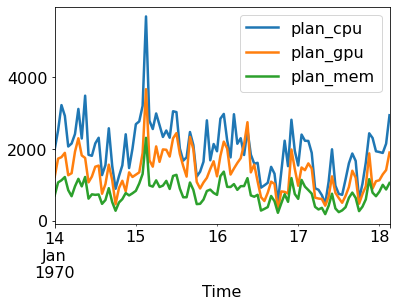

In [180]:
dfitcrh[:100].plot()

In [181]:
dfitcrh.to_csv("../../../../../notebooks/data/alibaba_hourly_cpu_gpu_mem.csv")

In [155]:
dfitcr_index = dfw.groupby('minuteofyear').aggregate("first")["start_date"].reset_index(drop=True)
dfitcr = dfw.groupby('minuteofyear').sum()[['plan_cpu','plan_gpu','plan_mem']].reset_index()
dfitcr["Time"] = dfitcr_index
dfitcr['Time'] = pd.to_datetime(dfitcr['Time'])
dfitcr['Time'] = dfitcr['Time'].dt.tz_convert(None)
dfitcr['Time'] = dfitcr['Time'].dt.floor('Min')
dfitcr.drop('minuteofyear', axis=1, inplace=True)
dfitcr = dfitcr[600:]
dfitcr.set_index("Time", inplace=True, drop=True)
dfitcr["plan_cpu"] = dfitcr["plan_cpu"]/1000
dfitcr["plan_gpu"] = dfitcr["plan_gpu"]/100
dfitcr["plan_mem"] = dfitcr["plan_mem"]/100
dfitcr
# dfitcr['minute'] = dfitcr.minuteofyear
# dfitcr['minute'] = dfitcr['minute'] - dfitcr['minute'][0]
# dfitcr['minute'] = dfitcr['minute'].astype(int)
# dfitcr['minute'].plot()

,plan_cpu,plan_gpu,plan_mem
Time,,,
1970-01-13 16:06:00,38.80,17.75,16.701914
1970-01-13 16:07:00,23.60,12.60,8.497070
1970-01-13 16:08:00,14.60,8.75,4.668164
1970-01-13 16:09:00,21.81,18.95,9.512305
1970-01-13 16:10:00,11.90,8.50,2.388164
...,...,...,...
1970-03-16 15:53:00,1.95,15.00,5.078125
1970-03-16 15:54:00,4.20,4.05,1.417422
1970-03-16 15:55:00,6.60,7.50,1.679688


In [156]:
dfitcr.to_csv("../../../../../notebooks/data/alibaba_minute_cpu_gpu_mem.csv")

In [117]:
dfitcr = dfw.groupby('minuteofyear').sum()[['plan_cpu','plan_gpu','plan_mem']].reset_index()
dfitcr = dfitcr[600:].reset_index(drop=True)
dfitcr['minute'] = dfitcr.minuteofyear
dfitcr['minute'] = dfitcr['minute'] - dfitcr['minute'][0]
dfitcr['minute'] = dfitcr['minute'].astype(int)
dfitcr['minute'].plot()

0         1970-01-07 01:19:26+08:00
1         1970-01-07 01:19:37+08:00
2         1970-01-07 07:20:13+08:00
3         1970-01-07 07:21:44+08:00
4         1970-01-07 11:42:27+08:00
                     ...           
7164353   1970-03-16 23:55:22+08:00
7164354   1970-03-16 23:56:02+08:00
7164355   1970-03-16 23:56:10+08:00
7164356   1970-03-16 23:56:37+08:00
7164357   1970-03-16 23:58:10+08:00
Name: start_date, Length: 7164358, dtype: datetime64[ns, Asia/Shanghai]

<AxesSubplot:>

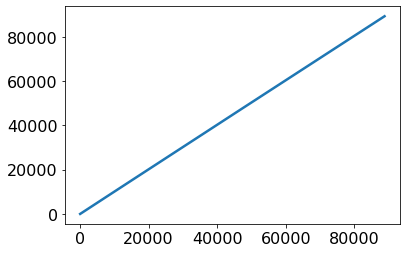

In [62]:
dfw['minuteofyear'] = dfw.start_date.apply(lambda c: c.dayofyear * 24 * 60 + c.hour * 60 +  c.minute)
dfitcr = dfw.groupby('minuteofyear').sum()[['plan_cpu','plan_gpu','plan_mem']].reset_index()
dfitcr = dfitcr[600:].reset_index(drop=True)
dfitcr['minute'] = dfitcr.minuteofyear
dfitcr['minute'] = dfitcr['minute'] - dfitcr['minute'][0]
dfitcr['minute'] = dfitcr['minute'].astype(int)
dfitcr['minute'].plot()

In [65]:
dfitcr["plan_cpu"] = dfitcr["plan_cpu"]/1000
dfitcr["plan_gpu"] = dfitcr["plan_gpu"]/100
dfitcr["plan_mem"] = dfitcr["plan_mem"]/100

In [79]:
import datetime as dt

dfitcr['time'] = dt.datetime(2022,1,1) + pd.TimedeltaIndex(dfitcr['minute'], unit='m')

In [80]:
dfitcr["time"]

0       2022-01-01 00:00:00
1       2022-01-01 00:01:00
2       2022-01-01 00:02:00
3       2022-01-01 00:03:00
4       2022-01-01 00:04:00
                ...        
88847   2022-03-03 23:47:00
88848   2022-03-03 23:48:00
88849   2022-03-03 23:49:00
88850   2022-03-03 23:50:00
88851   2022-03-03 23:52:00
Name: time, Length: 88852, dtype: datetime64[ns]

In [84]:
dfitcr.drop(['minuteofyear', 'minuteofyear', 'minute'], axis=1, inplace=True)

In [86]:
dfitcr["time"] = pd.to_datetime(dfitcr["time"])

In [87]:
dfitcr.set_index("time",inplace=True)

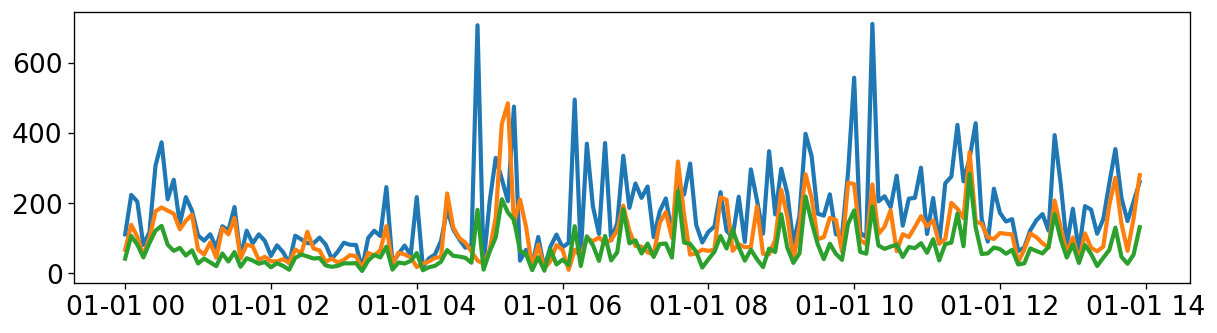

In [110]:
plt.figure(figsize=(12,3), dpi=120)
plt.plot(dfitcr.resample("5min").sum()[0:168])

plt.show()

<AxesSubplot:xlabel='time'>

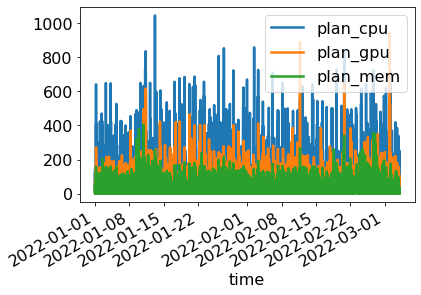

In [91]:
dfitcr.plot()

In [114]:
dfitcr.rename_axis("Time", inplace=True)

In [115]:
dfitcr.to_csv("../../../../../notebooks/data/alibaba_minute_cpu_gpu_mem.csv")

In [116]:
dfitcr.isnull().values.any()

False

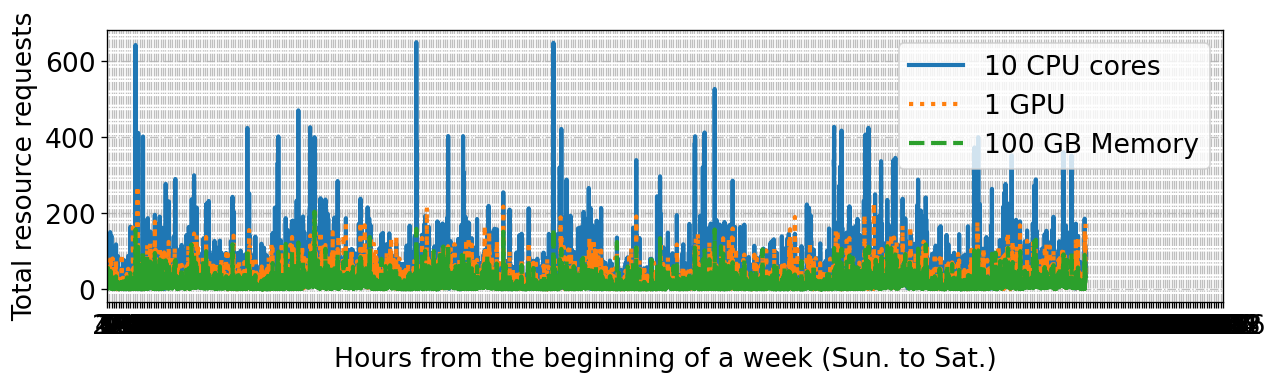

In [59]:
plt.figure(figsize=(12,3), dpi=120)
num_days = 7
plt.plot(dfitcr[(dfitcr.minute>=0)&(dfitcr.minute<24*num_days*60)].set_index('minute')['plan_cpu']/1000, label='10 CPU cores', linestyle='solid')
plt.plot(dfitcr[(dfitcr.minute>=0)&(dfitcr.minute<24*num_days*60)].set_index('minute')['plan_gpu']/100, label='1 GPU', linestyle='dotted')
plt.plot(dfitcr[(dfitcr.minute>=0)&(dfitcr.minute<24*num_days*60)].set_index('minute')['plan_mem']/100, label='100 GB Memory', linestyle='dashed')
plt.xlabel('Hours from the beginning of a week (Sun. to Sat.)')
plt.ylabel('Total resource requests')
plt.grid(alpha=0.8, linestyle='-.')
plt.legend(ncol=1, loc='best')
plt.xlim(0, 24*60*num_days)
_ = plt.xticks([24 * x for x in range((num_days+1)*60)])

<AxesSubplot:>

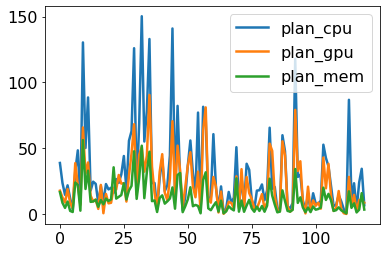

In [71]:
dfitcr[['plan_cpu','plan_gpu','plan_mem']][:2*60].plot()